# WR75 study case
In this script, we showcase how the particle monitor data from CST can be treated. Source `.cst` file for the electromagnetic and PIC solvers are provided.

## Loading files
First of all, we define the paths to the folder with all the `.txt` file produced by CST, as well as the character that separates the columns in the file.

In [1]:
from pathlib import Path
folder, delimiter = Path("cst", "WR75_reduced", "Export", "3d"), None

Now we load the particles. This operation will take a while, as there are a lot of files.

In [2]:
from multipactor.particle_monitor.particle_monitor import ParticleMonitor
my_particle_monitor = ParticleMonitor(folder, delimiter=delimiter)

/home/placais/Documents/Simulation/python/multipactor/particle_monitor/particle.py:346: RankWarning: Polyfit may be poorly conditioned
  polynom = np.polyfit(known_time, known_mom, poly_fit_deg)


## Plotting emission energies

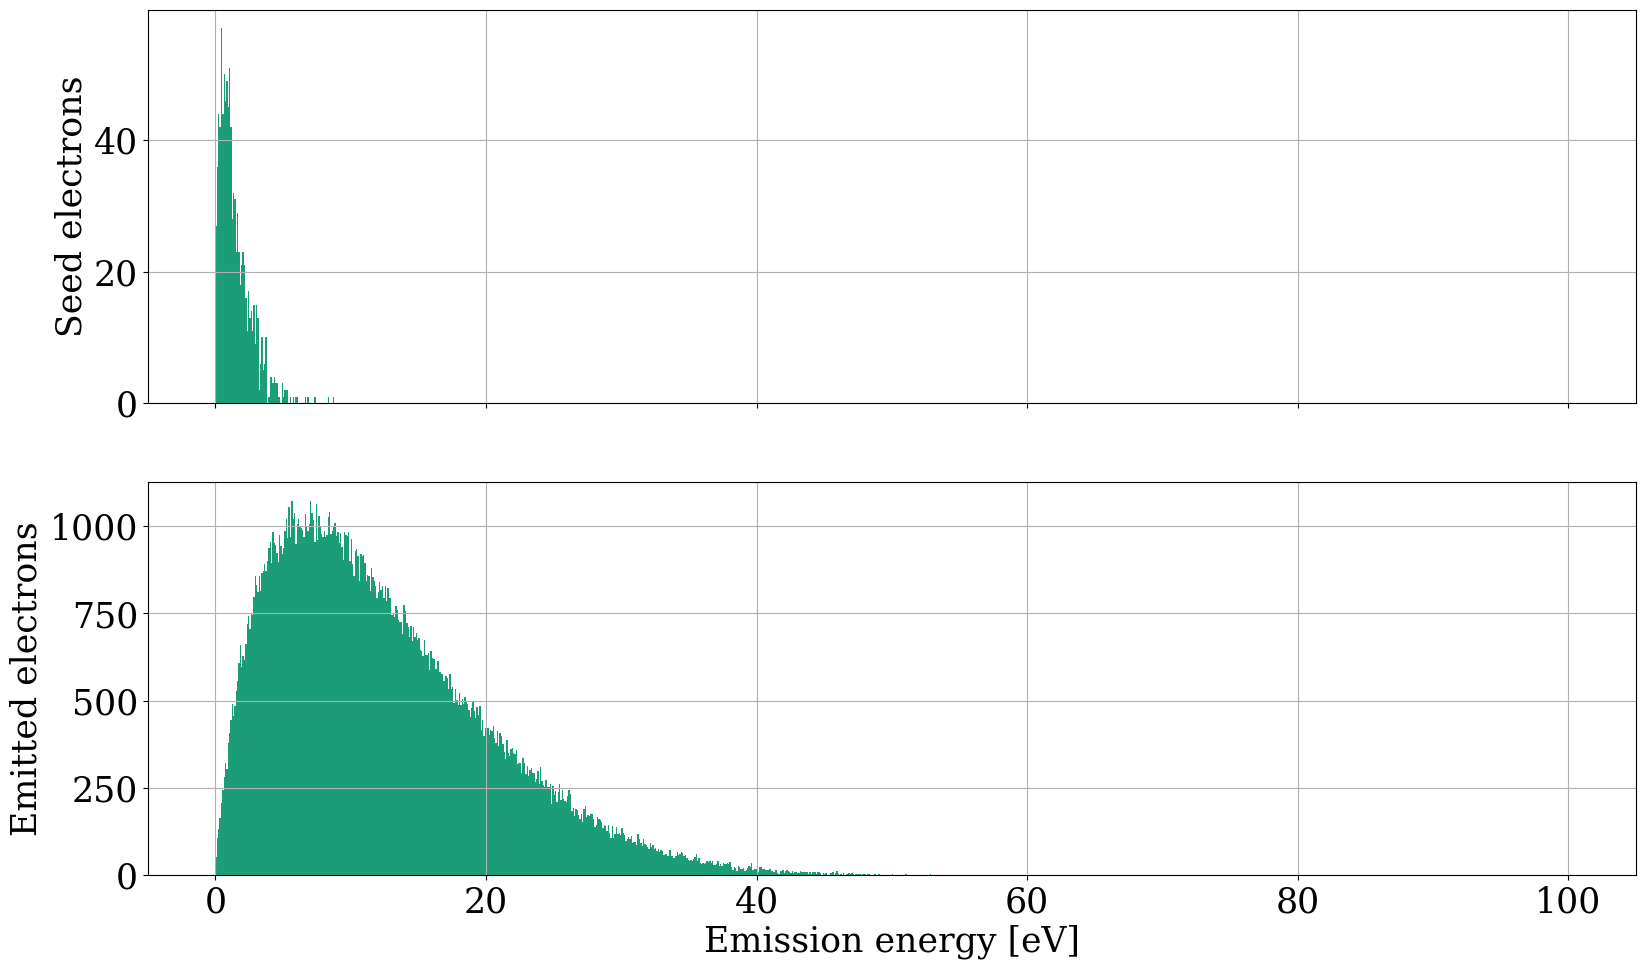

In [3]:
from multipactor.particle_monitor.studies import plot_emission_energies

bins = 1000  # Number of histogram bins
hist_range = (0., 1e2)  # Range of the histogram
fig = plot_emission_energies(my_particle_monitor, bins=bins, hist_range=hist_range)

## Plotting collision energies
To plot the distribution of the collision energies, the syntax is very similar.

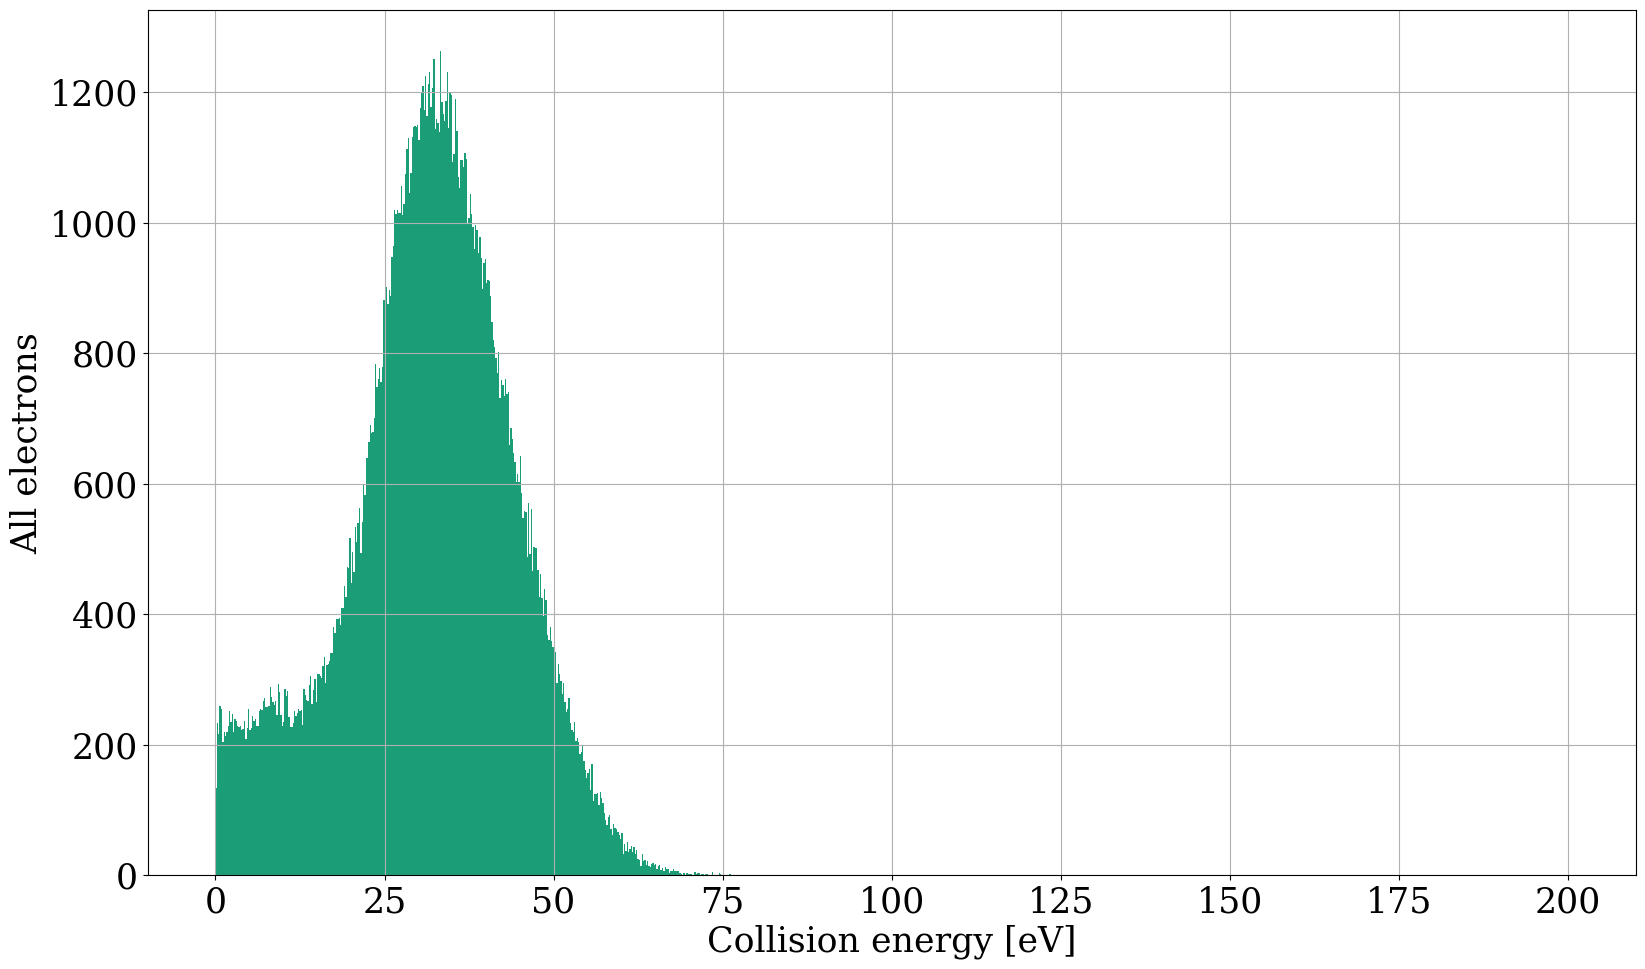

In [4]:
from multipactor.particle_monitor.studies import plot_collision_energies

bins = 1000
hist_range = (0., 2e2)
fig = plot_collision_energies(my_particle_monitor, bins=bins, hist_range=hist_range)

## Plotting trajectories
We can also plot some trajectories. First of all, we define `pid_to_plot`, a list of integers which correspond to the identifier (`pid`) of the particle to plot. Here, we will plot the trajectories of the first 100 particles.

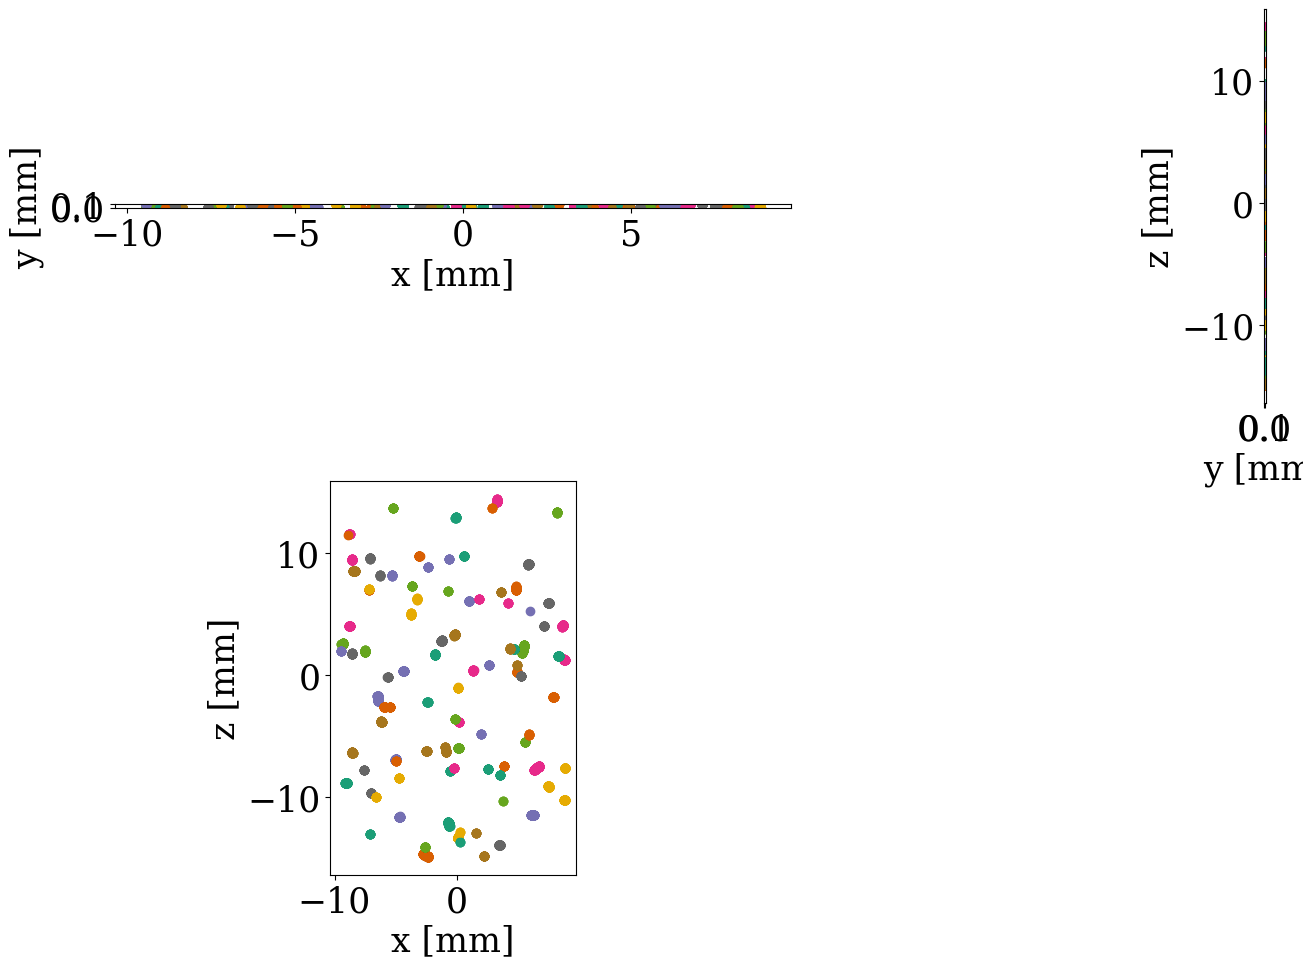

In [5]:
from multipactor.particle_monitor.studies import plot_trajectories

pid_to_plot = [i for i in range(100)]
fig = plot_trajectories(my_particle_monitor, pid_to_plot)

## Plotting collision angles
For this operation, we also need to know the direction of the velocity vector with respect to the surface at the collision point. Hence, we first load the `.stl` file holding geometry of the structure.
Not that this operations may be too heavy for jupyter-notebook. You may want to run these commands from your classic python environment.

In [7]:
stl_file = "cst/Particle_Monitor/tesla.stl"

from stl import mesh
my_mesh = mesh.Mesh.from_file(stl_file)

In [ ]:
from multipactor.particle_monitor.studies import plot_impact_angles

plot_impact_angles(my_particle_monitor, my_mesh)